In [1]:
% matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.style.use('ggplot')

In [2]:
def init():
    global R,V,W,Rs,Vs,Ws,time
    R[:,:] = 0.0
    V[:,:] = 0.0
    W[:,:] = 0.0
    Rs[:,:,:] = 0.0
    Vs[:,:,:] = 0.0
    Ws[:,:,:] = 0.0
    time[:] = 0.0
    title.set_text(r'')
    line.set_data([],[])
    line.set_3d_properties([])
    particles.set_data([],[])
    particles.set_3d_properties([])
    return particles,title,line

In [3]:
def animate(i):
    global R,V,W,Rs,Vs,Ws,time
    time[i]=i*dt
    W = std*np.random.randn(nump,dim)
    R, V = (R + (V*dt)), V*(1-zeta/m*dt)+W/m
    Rs[i,:,:]=R
    Vs[i,:,:]=V
    Ws[i,:,:]=W
    title.set_text(r"t = "+str(time[i]))
    line.set_data(Rs[:i+1,n,0],Rs[:i+1,n,1])
    line.set_3d_properties(Rs[:i+1,n,2])
    particles.set_data(R[:,0],R[:,1])
    particles.set_3d_properties(R[:,2])
    return particles,title,line

In [4]:
dim = 3
nump = 1000
nums = 1024
dt = 0.05
zeta = 0.5
m = 0.5
kBT = 0.5
std = np.sqrt(2*kBT*zeta*dt)
np.random.seed(0)
R = np.zeros([nump,dim]) # array to store current position
V = np.zeros([nump,dim]) # array to store current velocity
W = np.zeros([nump,dim]) # array to store current random forces
Rs = np.zeros([nums,nump,dim]) # array to store positions
Vs = np.zeros([nums,nump,dim]) # array to store velocities
Ws = np.zeros([nums,nump,dim]) # array to store random  forces
time = np.zeros([nums]) # array to store all time steps

<IPython.core.display.Javascript object>


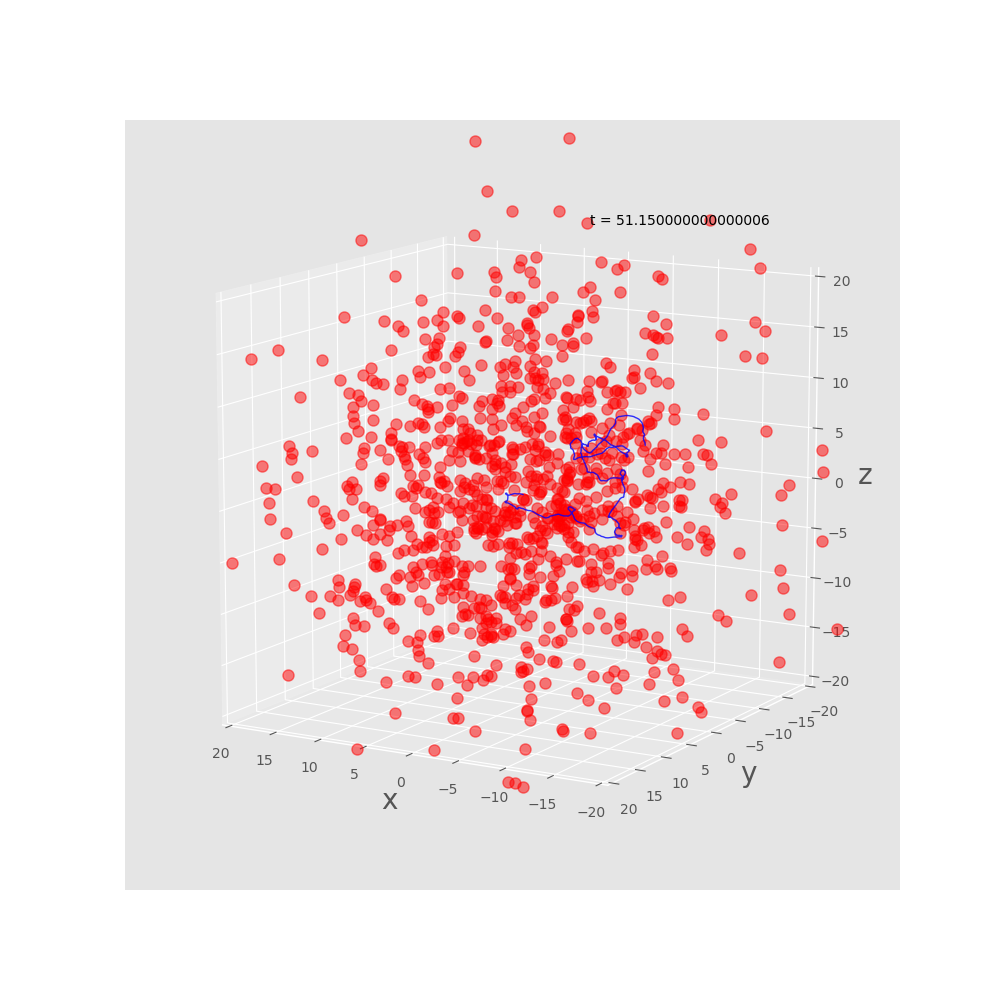

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
box = 40
ax.set_xlim(-box/2,box/2)
ax.set_ylim(-box/2,box/2)
ax.set_zlim(-box/2,box/2)
ax.set_xlabel(r"x", fontsize=20)
ax.set_ylabel(r"y", fontsize=20)
ax.set_zlabel(r"z", fontsize=20)
ax.view_init(elev=12,azim=120)
particles, = ax.plot([],[],[],'ro',ms=8,alpha=0.5)
title = ax.text(-180.,0.,250.,r'',transform=ax.transAxes,va='center')
line, = ax.plot([],[],[],'b',lw=1,alpha=0.8)
n = 0
anim = animation.FuncAnimation(fig,func=animate,init_func=init,frames=nums,interval=5,blit=True,repeat=False)
#anim.save('BrownianMotion.mp4',fps=50,dpi=100)